# Analysis

In [1]:
##

In [6]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sb
import numpy as np
import datetime
from pprint import pprint
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [7]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# Twitter credentials and APi authentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
# List to hold results
sentiment = []
# List to hold results
results_list = []

# Target Search Term
target_users = ("@RTC", "@APTA_Transit","@Bart","@MTA","@CTA", "@Uber","@Lyft")

# Variables for holding sentiments
# compound_list = []
# positive_list = []
# negative_list = []
# neutral_list = []

In [10]:
# Loop through all target users
for user in target_users:
    
    # count the tweet    
    counter = 0
    
    # Grab 100 tweets
    public_tweets = api.search(user, count=100, result_type="recent")
#     pprint (public_tweets)
        
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_count = counter

        #Add sentiments for ech tweet to the sentiments list
        sentiment.append ({"User": user,
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet text": tweet_text,
            "Tweet Count": counter})

        counter = counter + 1

            # Print the Sentiments
    pprint(sentiment)
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

[{'Compound': 0.0,
  'Date': 'Fri Apr 06 11:13:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @SPCIQ: #incendie 3330 Monnerie sous contrôle .Bâtiment '
                'résidentiel 16 logements . Plusieurs personnes prises en '
                'charge par la Croix Rou…',
  'User': '@RTC'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 06 07:39:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': '#incendie 3330 Monnerie sous contrôle .Bâtiment résidentiel '
                '16 logements . Plusieurs personnes prises en charge par… '
                'https://t.co/QDmsK0cn6p',
  'User': '@RTC'},
 {'Compound': 0.4939,
  'Date': 'Thu Apr 05 18:32:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.849,
  'Positive': 0.151,
  'Tweet Count': 2,
  'Tweet text': 'RT @maxgeorge100: Oh the joys of looking at twitter on a '
                'packed commuter train 😉😈😍😍 @empresswishes @DommeL

[{'Compound': 0.0,
  'Date': 'Fri Apr 06 11:13:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @SPCIQ: #incendie 3330 Monnerie sous contrôle .Bâtiment '
                'résidentiel 16 logements . Plusieurs personnes prises en '
                'charge par la Croix Rou…',
  'User': '@RTC'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 06 07:39:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': '#incendie 3330 Monnerie sous contrôle .Bâtiment résidentiel '
                '16 logements . Plusieurs personnes prises en charge par… '
                'https://t.co/QDmsK0cn6p',
  'User': '@RTC'},
 {'Compound': 0.4939,
  'Date': 'Thu Apr 05 18:32:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.849,
  'Positive': 0.151,
  'Tweet Count': 2,
  'Tweet text': 'RT @maxgeorge100: Oh the joys of looking at twitter on a '
                'packed commuter train 😉😈😍😍 @empresswishes @DommeL

                'hartrevalidatie https://t.co/TkYqfwa1mY  #HartRevalidatie '
                '#eCoach @micbelgique @bart',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 05:06:29 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 18,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:58:09 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 19,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:12:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 20,
 

[{'Compound': 0.0,
  'Date': 'Fri Apr 06 11:13:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @SPCIQ: #incendie 3330 Monnerie sous contrôle .Bâtiment '
                'résidentiel 16 logements . Plusieurs personnes prises en '
                'charge par la Croix Rou…',
  'User': '@RTC'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 06 07:39:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': '#incendie 3330 Monnerie sous contrôle .Bâtiment résidentiel '
                '16 logements . Plusieurs personnes prises en charge par… '
                'https://t.co/QDmsK0cn6p',
  'User': '@RTC'},
 {'Compound': 0.4939,
  'Date': 'Thu Apr 05 18:32:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.849,
  'Positive': 0.151,
  'Tweet Count': 2,
  'Tweet text': 'RT @maxgeorge100: Oh the joys of looking at twitter on a '
                'packed commuter train 😉😈😍😍 @empresswishes @DommeL

  'Negative': 0.225,
  'Neutral': 0.631,
  'Positive': 0.144,
  'Tweet Count': 27,
  'Tweet text': 'RT @bart: Doctors shortage + demand &gt; Millennials demand '
                'telehealth in a move away from traditional primary care model '
                'https://t.co/BXgeTjx…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 05 16:48:49 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 28,
  'Tweet text': '@LowKeyRider11 @JennyGShao @SRobertsKRON4 @KTVU @kron4 @kpix '
                '@abc7newsbayarea @StevenAveson @HeatherKTVU @DionLimTV… '
                'https://t.co/igguEEQA7F',
  'User': '@Bart'},
 {'Compound': 0.5719,
  'Date': 'Thu Apr 05 16:16:47 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.448,
  'Positive': 0.552,
  'Tweet Count': 29,
  'Tweet text': 'Happy Thursday @bart https://t.co/Fd4I8R5Sih',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 05 13:31:45 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Posi

 {'Compound': 0.0,
  'Date': 'Wed Apr 11 23:30:13 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 90,
  'Tweet text': 'Left work 90 minutes ago. I live 52 minutes away from my '
                'office, according to the @MTA’s own website. I am STILL 20… '
                'https://t.co/nxyNNGAmor',
  'User': '@MTA'},
 {'Compound': 0.5106,
  'Date': 'Wed Apr 11 23:28:35 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.87,
  'Positive': 0.13,
  'Tweet Count': 91,
  'Tweet text': 'It’s a mystery why the city and state trust @mta @NYCTSubway '
                'with any money at all. @mta is full of crooks and feck… '
                'https://t.co/s7e7x9DLvC',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 23:28:13 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 92,
  'Tweet text': '@alykatzz @MTA At least something is working in NYC.\n'
                'Where would we be without Wi-Fi? \n'
              

  'Tweet Count': 17,
  'Tweet text': 'Virtuele coaches en activiteitsensor  voor betere '
                'hartrevalidatie https://t.co/TkYqfwa1mY  #HartRevalidatie '
                '#eCoach @micbelgique @bart',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 05:06:29 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 18,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:58:09 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 19,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:12:06 +

  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 80,
  'Tweet text': '@MTA it took me 1 hour and 45 minutes, door to door, to get '
                'home tonight, and I was traveling from Time Square to P… '
                'https://t.co/AvW5B5cIcB',
  'User': '@MTA'},
 {'Compound': -0.3382,
  'Date': 'Wed Apr 11 23:40:32 +0000 2018',
  'Negative': 0.115,
  'Neutral': 0.834,
  'Positive': 0.051,
  'Tweet Count': 81,
  'Tweet text': '@ScottyDLux @MTA @NYCFC @BilldeBlasio  oh I guess no matter '
                'how much they "upgrade" my NYC, some things remain the same! '
                '#subwayblues',
  'User': '@MTA'},
 {'Compound': -0.7184,
  'Date': 'Wed Apr 11 23:39:11 +0000 2018',
  'Negative': 0.261,
  'Neutral': 0.739,
  'Positive': 0.0,
  'Tweet Count': 82,
  'Tweet text': '@NYGovCuomo You know what else is dehumanizing? NYC residents '
                'losing millions of hours a day because of @MTA perfor… '
                'https://t.co/Q6iic13vm0',


  'Tweet Count': 86,
  'Tweet text': '@cta How late will the Yellow Line run from Howard after '
                "tonight's Cubs game? Thanks.",
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 16:41:43 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 87,
  'Tweet text': 'RT @AdolfogusResist: CUANDO EL ODIO DE CLASES\n'
                'EL ANTI-PERONISMO CRECE\n'
                'APARECEN LAS DICTADURAS\n'
                '\n'
                'ARGENTINA EN SU LABERINTO\n'
                '@TognettiDaniel\n'
                '@V…',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 16:37:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 88,
  'Tweet text': 'CUANDO EL ODIO DE CLASES\n'
                'EL ANTI-PERONISMO CRECE\n'
                'APARECEN LAS DICTADURAS\n'
                '\n'
                'ARGENTINA EN SU LABERINTO\n'
                '@TognettiDaniel… https://t.co/QiV748W4US

  'Neutral': 0.877,
  'Positive': 0.0,
  'Tweet Count': 14,
  'Tweet text': '@bart Sadly I see future Medics being trained for a job that '
                "doesn't exist &amp; too many young Drs defending status qu… "
                'https://t.co/Ap9u2GA0SS',
  'User': '@Bart'},
 {'Compound': -0.7269,
  'Date': 'Sun Apr 08 08:01:00 +0000 2018',
  'Negative': 0.366,
  'Neutral': 0.545,
  'Positive': 0.089,
  'Tweet Count': 15,
  'Tweet text': 'RT @DOUGBALDWINFANS: @Bart Hubbuch please unfollow me. You '
                'are a biased, unprofessional prick with a east coast cock in '
                'your mouth..',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 02:28:24 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 16,
  'Tweet text': 'On @BART station this on the tracks https://t.co/7h1ssbXUhi',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 16:29:38 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,


  'Date': 'Wed Apr 11 23:56:01 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.696,
  'Positive': 0.304,
  'Tweet Count': 71,
  'Tweet text': 'RT @kkschwab: Hi @MTA if any of your trains could show up '
                'tonight that would be great, thanks.',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 23:55:39 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 72,
  'Tweet text': '@Meezy_Luv @MTA Garbage service!!!!',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 23:55:32 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 73,
  'Tweet text': '@BebeNeuwirth @MTA I work summers at the convent of the '
                'sacred heart (Elaine Stritchs alma mater), and can’t wait t… '
                'https://t.co/tRPTrBdaYI',
  'User': '@MTA'},
 {'Compound': -0.2382,
  'Date': 'Wed Apr 11 23:53:11 +0000 2018',
  'Negative': 0.149,
  'Neutral': 0.701,
  'Positive': 0.151,
  'Tweet Count': 74,
  

  'Tweet Count': 47,
  'Tweet text': 'Then after waiting for my train they decide to make it '
                'express to miss my stop because @cta sucks dicks',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 22:19:13 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 48,
  'Tweet text': '@cta can I get some a/c?',
  'User': '@CTA'},
 {'Compound': 0.296,
  'Date': 'Wed Apr 11 22:16:42 +0000 2018',
  'Negative': 0.153,
  'Neutral': 0.687,
  'Positive': 0.16,
  'Tweet Count': 49,
  'Tweet text': 'Have to love drunk guys passing out next to you and stopping '
                'rush hour commutes. Another day with @cta @CTAFails '
                'https://t.co/xgEh0TG2dD',
  'User': '@CTA'},
 {'Compound': -0.6908,
  'Date': 'Wed Apr 11 22:06:13 +0000 2018',
  'Negative': 0.192,
  'Neutral': 0.808,
  'Positive': 0.0,
  'Tweet Count': 50,
  'Tweet text': 'Fuck you @cta there is no need for a blue line train that '
                'only goes to 

  'Tweet Count': 37,
  'Tweet text': 'RT @AllisonLMcManus: My latest for @theintercept explores the '
                "ramifications of Egypt's forthcoming passenger transportation "
                'law on ride sha…',
  'User': '@Uber'},
 {'Compound': -0.296,
  'Date': 'Thu Apr 12 01:44:50 +0000 2018',
  'Negative': 0.196,
  'Neutral': 0.692,
  'Positive': 0.112,
  'Tweet Count': 38,
  'Tweet text': '@Uber truly blown away by the poor customer service it’s '
                'pouring rain and you’re driver just cancelled after I waited '
                'fifteen minutes',
  'User': '@Uber'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 12 01:44:43 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 39,
  'Tweet text': 'RT @ManzanaDeVuelta: ¿Crees que la herramienta de @Uber '
                '@Uber_MEX está perdiendo popularidad?',
  'User': '@Uber'},
 {'Compound': -0.296,
  'Date': 'Thu Apr 12 01:44:18 +0000 2018',
  'Negative': 0.099,
  'Neutral': 0.901,
  

[{'Compound': 0.0,
  'Date': 'Fri Apr 06 11:13:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @SPCIQ: #incendie 3330 Monnerie sous contrôle .Bâtiment '
                'résidentiel 16 logements . Plusieurs personnes prises en '
                'charge par la Croix Rou…',
  'User': '@RTC'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 06 07:39:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': '#incendie 3330 Monnerie sous contrôle .Bâtiment résidentiel '
                '16 logements . Plusieurs personnes prises en charge par… '
                'https://t.co/QDmsK0cn6p',
  'User': '@RTC'},
 {'Compound': 0.4939,
  'Date': 'Thu Apr 05 18:32:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.849,
  'Positive': 0.151,
  'Tweet Count': 2,
  'Tweet text': 'RT @maxgeorge100: Oh the joys of looking at twitter on a '
                'packed commuter train 😉😈😍😍 @empresswishes @DommeL

  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:58:09 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 19,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:12:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 20,
  'Tweet text': '@KayaJones This @Bart Hubbach is an asshat!',
  'User': '@Bart'},
 {'Compound': -0.8074,
  'Date': 'Fri Apr 06 22:31:28 +0000 2018',
  'Negative': 0.278,
  'Neutral': 0.722,
  'Positive': 0.0,
  'Tweet Count': 21,
  'Tweet text': 'Other than the egregious heroin INJE

  'User': '@MTA'},
 {'Compound': 0.7003,
  'Date': 'Wed Apr 11 23:42:39 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.58,
  'Positive': 0.42,
  'Tweet Count': 79,
  'Tweet text': '@Noelle_CD @MTA Hit up @NYCTSubway , they’re v prompt and '
                'helpful :)',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 23:41:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 80,
  'Tweet text': '@MTA it took me 1 hour and 45 minutes, door to door, to get '
                'home tonight, and I was traveling from Time Square to P… '
                'https://t.co/AvW5B5cIcB',
  'User': '@MTA'},
 {'Compound': -0.3382,
  'Date': 'Wed Apr 11 23:40:32 +0000 2018',
  'Negative': 0.115,
  'Neutral': 0.834,
  'Positive': 0.051,
  'Tweet Count': 81,
  'Tweet text': '@ScottyDLux @MTA @NYCFC @BilldeBlasio  oh I guess no matter '
                'how much they "upgrade" my NYC, some things remain the same! '
                '#subwayblues',
  'User': '@

  'Positive': 0.0,
  'Tweet Count': 56,
  'Tweet text': 'RT @WBEZWorldview: "We shouldn\'t have to turn over an entire '
                'paycheck just to ride the train from one side of town to '
                'another," says James…',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 21:05:36 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 57,
  'Tweet text': 'RT @ZachThaRippa: When there’s a guy doing gymnamstics while '
                'smoking a blunt across from a lady smoking a cigarette on the '
                'red line and a @…',
  'User': '@CTA'},
 {'Compound': -0.5423,
  'Date': 'Wed Apr 11 20:58:52 +0000 2018',
  'Negative': 0.127,
  'Neutral': 0.873,
  'Positive': 0.0,
  'Tweet Count': 58,
  'Tweet text': 'RT @_glike: @cta how is it possible that you constantly fuck '
                'up forest park trains so that there’s 17 minute gaps between '
                'trains on a weekd…',
  'User': '@CTA'},
 {'Compound': -0.2263

  'Tweet Count': 32,
  'Tweet text': '@Uber @Uber_Support My ride to YYZ cost way more than the '
                'estimate. Airport cab was 38$ on way home and a nice Lexu… '
                'https://t.co/DY45qNUmDy',
  'User': '@Uber'},
 {'Compound': -0.6249,
  'Date': 'Thu Apr 12 01:46:14 +0000 2018',
  'Negative': 0.163,
  'Neutral': 0.837,
  'Positive': 0.0,
  'Tweet Count': 33,
  'Tweet text': 'RT @_SantiArbelaez: I think @Uber might have the worst '
                'customer service ever. And my parents used to have Comcast. \n'
                '\n'
                'How you doin’ @lyft 😏',
  'User': '@Uber'},
 {'Compound': -0.296,
  'Date': 'Thu Apr 12 01:46:07 +0000 2018',
  'Negative': 0.099,
  'Neutral': 0.901,
  'Positive': 0.0,
  'Tweet Count': 34,
  'Tweet text': 'RT @vaidesmaiar: Me ajudem em uma reclamação ou a achar? '
                'Esqueci um esquipamento no @Uber_Brasil Tentei solucionar de '
                'tds as formas. A @Ube…',
  'User': '@Uber'},
 {'Compound

  'Date': 'Thu Apr 12 01:36:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 22,
  'Tweet text': '@Uber @lyft https://t.co/k8QCDQYS1H',
  'User': '@Lyft'},
 {'Compound': 0.7345,
  'Date': 'Thu Apr 12 01:35:05 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.754,
  'Positive': 0.246,
  'Tweet Count': 23,
  'Tweet text': "RT @lyft: We're helping @iamcardib celebrate her new album! "
                'Enter code CARDIINVASION in the Lyft app to unlock Cardi '
                'cars. https://t.co/fb3…',
  'User': '@Lyft'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 12 01:34:49 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 24,
  'Tweet text': 'The insolence that @Lyft @Uber cars have to those of us '
                'waiting patiently for a bus in the pouring rain is outrageo… '
                'https://t.co/KbH4uKKjLU',
  'User': '@Lyft'},
 {'Compound': 0.6249,
  'Date': 'Thu Apr 12 01:34:44 +0000 2018',
  'Negative': 0

In [11]:
news_sentiment_df = pd.DataFrame.from_dict(sentiment).round(3)
news_sentiment_df["User"].describe()
# news_sentiment_df

count      551
unique       7
top       @CTA
freq       100
Name: User, dtype: object

In [12]:
news_sentiments_csv= news_sentiment_df[['User','Date','Tweet text','Compound','Positive','Neutral','Negative','Tweet Count']]
news_sentiments_csv

,User,Date,Tweet text,Compound,Positive,Neutral,Negative,Tweet Count
0,@RTC,Fri Apr 06 11:13:59 +0000 2018,RT @SPCIQ: #incendie 3330 Monnerie sous contrô...,0.000,0.000,1.000,0.000,0
1,@RTC,Fri Apr 06 07:39:31 +0000 2018,#incendie 3330 Monnerie sous contrôle .Bâtimen...,0.000,0.000,1.000,0.000,1
2,@RTC,Thu Apr 05 18:32:22 +0000 2018,RT @maxgeorge100: Oh the joys of looking at tw...,0.494,0.151,0.849,0.000,2
3,@RTC,Thu Apr 05 18:18:44 +0000 2018,RT @maxgeorge100: Oh the joys of looking at tw...,0.494,0.151,0.849,0.000,3
4,@RTC,Thu Apr 05 18:16:52 +0000 2018,Oh the joys of looking at twitter on a packed ...,0.494,0.167,0.833,0.000,4
5,@RTC,Wed Apr 04 16:08:54 +0000 2018,@rtc #canadiansinlondon https://t.co/OCKpLvWNVf,0.000,0.000,1.000,0.000,5
6,@APTA_Transit,Wed Apr 11 23:40:30 +0000 2018,@BrentToderian @TransLink @grescoe @FreeRangeK...,0.000,0.000,1.000,0.000,0
7,@APTA_Transit,Wed Apr 11 21:48:32 +0000 2018,RT @APTA_Transit: Public transportation suppor...,0.772,0.312,0.688,0.000,1
8,@APTA_Transit,Wed Apr 11 21:26:56 +0000 2018,RT @APTA_Transit: Public transportation suppor...,0.772,0.312,0.688,0.000,2
9,@APTA_Transit,Wed Apr 11 21:26:32 +0000 2018,RT @APTA_Transit: Congratulations to @RideKCTr...,0.855,0.439,0.561,0.000,3


In [13]:
#Export DataFrame to csv
news_sentiment_df.to_csv("News_Mood_Twitter.csv", index=False)

In [14]:
news_sentiment_compound_df = news_sentiment_df.groupby("User")["Compound"].mean()
news_sentiment_compound_df

User
@APTA_Transit    0.395250
@Bart           -0.069733
@CTA             0.004610
@Lyft            0.222930
@MTA             0.061570
@RTC             0.247000
@Uber           -0.047930
Name: Compound, dtype: float64

In [15]:
news_sentiment_positive_df = news_sentiment_df.groupby("User")["Positive"].mean()
news_sentiment_positive_df

User
@APTA_Transit    0.154960
@Bart            0.068000
@CTA             0.091160
@Lyft            0.125540
@MTA             0.102790
@RTC             0.078167
@Uber            0.059760
Name: Positive, dtype: float64

In [16]:
news_sentiment_neutral_df = news_sentiment_df.groupby("User")["Neutral"].mean()
news_sentiment_neutral_df

User
@APTA_Transit    0.839970
@Bart            0.851267
@CTA             0.840710
@Lyft            0.838250
@MTA             0.825930
@RTC             0.921833
@Uber            0.864630
Name: Neutral, dtype: float64

In [17]:
news_sentiment_negative_df = news_sentiment_df.groupby("User")["Negative"].mean()
news_sentiment_negative_df

User
@APTA_Transit    0.005090
@Bart            0.080733
@CTA             0.068110
@Lyft            0.036220
@MTA             0.071290
@RTC             0.000000
@Uber            0.075610
Name: Negative, dtype: float64

In [18]:
summary_breakdown = pd.DataFrame({"Compound":news_sentiment_compound_df,
                                  "Positive":news_sentiment_positive_df, 
                                  "Neutral":news_sentiment_neutral_df,
                                  "Negative":news_sentiment_negative_df})
summary_breakdown

,Compound,Negative,Neutral,Positive
User,,,,
@APTA_Transit,0.395250,0.005090,0.839970,0.154960
@Bart,-0.069733,0.080733,0.851267,0.068000
@CTA,0.004610,0.068110,0.840710,0.091160
@Lyft,0.222930,0.036220,0.838250,0.125540
@MTA,0.061570,0.071290,0.825930,0.102790
@RTC,0.247000,0.000000,0.921833,0.078167
@Uber,-0.047930,0.075610,0.864630,0.059760


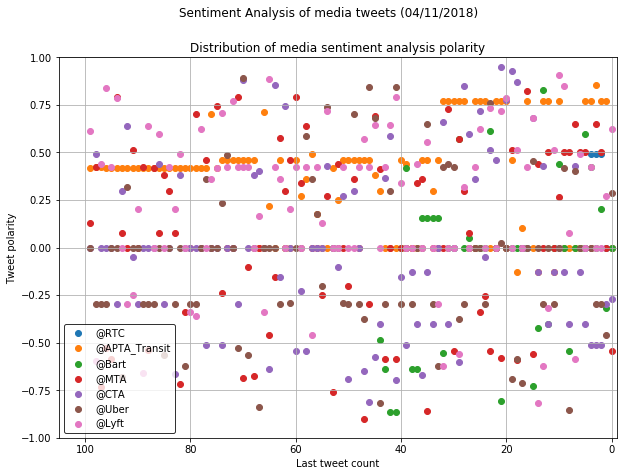

In [19]:
date = time.strftime("%m/%d/%Y")

plt.figure(figsize = (10,7))
plt.xlim(105,-1)
plt.ylim(-1,1)
plt.grid()

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiment_df.loc[news_sentiment_df["User"] == user]
    plt.scatter(dataframe["Tweet Count"],dataframe["Compound"],label = user)    
    

#Title, axis plot
plt.suptitle("Sentiment Analysis of media tweets (%s)"% (date))
plt.title("Distribution of media sentiment analysis polarity")
plt.xlabel("Last tweet count")
plt.ylabel("Tweet polarity")

legend = plt.legend(frameon = True, edgecolor = "black")

# Save an image of the chart and print to screen
plt.savefig("Sentiment_analysis_meadia_tweets.png")
plt.show()


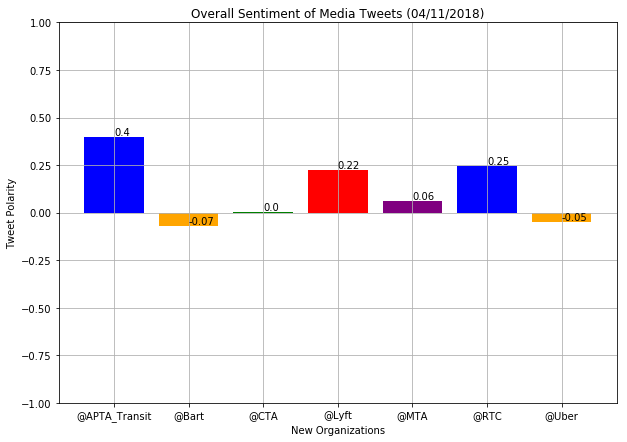

In [20]:
plt.figure(figsize = (10,7))
plt.ylim(-1,1)
plt.grid()

colors = ["blue", "orange", "green","red","purple"]
x_axis = np.arange(len(news_sentiment_compound_df))
xlabels = news_sentiment_compound_df.index
count = 0

for sentiment in news_sentiment_compound_df:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
plt.bar(x_axis, news_sentiment_compound_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.


plt.title("Overall Sentiment of Media Tweets (%s)"% (date))
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_sentiment_of_media_tweets.png")
plt.show()